<a href="https://colab.research.google.com/github/LucaMagini/AgeDetection/blob/main/4CNN_Advanced_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best Deep CNN Architectures

There are many tech companies have developed active research groups for exploring new architectures of **CNN** such as Google, Microsoft or Facebook and they demonstrated that **CNN**s are one of the best learning algorithms for understanding and analyzing image content having shown high performance in image classification, detection and related tasks.  

Over the years many variants of **CNN** architectures have been developed to solve real-world problems. In this notebook we are going to try some of the most known architectures on our problem expecting for better results than the basic models in the previous notebook.  
<br />

The following networks will be implemented:  
  * **LeNet-5** (1998)
  * **AlexNet** (2012)
  * **GoogLeNet** (2014)  
<br />  

There are many other **CNN** architectures which have given excellent results, developed in last years, but generally they are very deep and they need a lot of computational resources to be trained in a reasonable amount of time.  
In order to use these networks we have to overcome this kind of resources issues and we can do it through the ***transfer learning*** which is a machine learning method where we reuse a pre-trained model as a starting point fro a model on a new task.  
We'll use this technique in the next notebook, now let's upload the data and proceed with the implementation of the networks listed above.


## Data Preparation

In [ ]:
#Importing the libraries
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tabulate import tabulate

In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Google Colab GPU Version
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Tue Oct 25 10:08:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Unzipping all the datasets
train_augmented_path = '/content/drive/MyDrive/Age_Detection_Project/Data/Train_Augmented.zip'
dev_path = '/content/drive/MyDrive/Age_Detection_Project/Data/Dev.zip'
test_path = '/content/drive/MyDrive/Age_Detection_Project/Data/Test.zip'

paths = [dev_path, test_path, train_augmented_path]

for path in paths:         
    with ZipFile(path, 'r') as myzip:
        myzip.extractall('../content/{}'.format(path.split('/')[-1].split('.')[0]))
        print('Done unzipping {}'.format(path.split('/')[-1]))

Done unzipping Dev.zip
Done unzipping Test.zip
Done unzipping Train_Augmented.zip


In [ ]:
#Naming the folders containing data
train_augmented_folder = '../content/Train_Augmented'
dev_folder = '../content/Dev'
test_folder = '../content/Test'

In [ ]:
#Data for LeNet-5 Neural Network
batch_size = 128

train_ds_lenet5 = tf.keras.utils.image_dataset_from_directory(
  train_augmented_folder,
  labels='inferred',
  label_mode='int',
  validation_split=None, #Fraction of data reserved for validation
  subset=None, #If we want to divide data in the folder in training and validation sets
  seed=41, #Seed should guarantee that training and validation set haven't common images
  shuffle=True,
  color_mode='grayscale',
  image_size=(32, 32),
  batch_size=batch_size
  )

val_ds_lenet5 = tf.keras.utils.image_dataset_from_directory(
  dev_folder,
  labels='inferred',
  label_mode='int',
  validation_split=None,
  subset=None,
  seed=41, 
  shuffle=True,
  color_mode='grayscale',
  image_size=(32, 32),
  batch_size=batch_size
  )

test_dataset_lenet5 = tf.keras.utils.image_dataset_from_directory(
  test_folder,
  labels='inferred',
  label_mode='int',
  validation_split=None,
  subset=None,
  seed=41, 
  shuffle=True,
  color_mode='grayscale',
  image_size=(32, 32),
  batch_size=batch_size
  )

print('Batches for training -->', train_ds_lenet5.cardinality())
print('Batches for validating -->', val_ds_lenet5.cardinality())
print('Batches for testing -->', test_dataset_lenet5.cardinality())

Found 166026 files belonging to 8 classes.
Found 5083 files belonging to 8 classes.
Found 5083 files belonging to 8 classes.
Batches for training --> tf.Tensor(1298, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(40, shape=(), dtype=int64)
Batches for testing --> tf.Tensor(40, shape=(), dtype=int64)


In [ ]:
#Data for AlexNet Neural Network
batch_size = 128

train_ds_alexnet = tf.keras.utils.image_dataset_from_directory(
  train_augmented_folder,
  labels='inferred',
  label_mode='int',
  validation_split=None, #Fraction of data reserved for validation
  subset=None, #If we want to divide data in the folder in training and validation sets
  seed=41, #Seed should guarantee that training and validation set haven't common images
  shuffle=True,
  color_mode='rgb',
  image_size=(227, 227),
  batch_size=batch_size
  )

val_ds_alexnet = tf.keras.utils.image_dataset_from_directory(
  dev_folder,
  labels='inferred',
  label_mode='int',
  validation_split=None,
  subset=None,
  seed=41, 
  shuffle=True,
  color_mode='rgb',
  image_size=(227, 227),
  batch_size=batch_size
  )

test_dataset_alexnet = tf.keras.utils.image_dataset_from_directory(
  test_folder,
  labels='inferred',
  label_mode='int',
  validation_split=None,
  subset=None,
  seed=41, 
  shuffle=True,
  color_mode='rgb',
  image_size=(227, 227),
  batch_size=batch_size
  )

print('Batches for training -->', train_ds_alexnet.cardinality())
print('Batches for validating -->', val_ds_alexnet.cardinality())
print('Batches for testing -->', test_dataset_alexnet.cardinality())

Found 166026 files belonging to 8 classes.
Found 5083 files belonging to 8 classes.
Found 5083 files belonging to 8 classes.
Batches for training --> tf.Tensor(1298, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(40, shape=(), dtype=int64)
Batches for testing --> tf.Tensor(40, shape=(), dtype=int64)


In [ ]:
#Defining a function to plot the model results
def plot_model_stats(train_loss, val_loss, train_accuracy, val_accuracy, title):
    fig, ax = plt.subplots(ncols=2, figsize=(15,7))

    ax = ax.ravel()

    ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
    ax[0].plot(val_loss, label='Validation Loss', color = 'orangered', marker='o', markersize=5)

    ax[0].set_xlabel('Epochs', fontsize=14)
    ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

    ax[0].legend(fontsize=14)
    ax[0].tick_params(axis='both', labelsize=12)

    ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
    ax[1].plot(val_accuracy, label='Validation Accuracy', color='orangered', marker='o', markersize=5)

    ax[1].set_xlabel('Epochs', fontsize=14)
    ax[1].set_ylabel('Accuracy', fontsize=14)

    ax[1].legend(fontsize=14)
    ax[1].tick_params(axis='both', labelsize=12)

    fig.suptitle(x=0.5, y=0.94, t=title, fontsize=16)

## LeNet-5

LeNet-5 is a **CNN** structure proposed by **Yann LeCun** in the research paper "*Gradient-Based Learning Applied to Document Recognition*" in 1998.  
**LeCun** and his team reviewed various methods on handwritten character recognition in paper, and used standard handwritten digits to identify benchmark tasks. These models were compared and the results showed that the network outperformed all other models.  

The research achieved great success and aroused the interest of scholars in the study of neural networks. LeNet-5 was the starting point for a large number of neural network architectures, and also brought inspiration to the field.  

The input for LeNet-5 is a 32x32 grayscale image and its architecture is made up of 7 layers: 3 convolutional layers, 2 subsampling layers and 2 fully connected layers.

In [ ]:
lenet_5_model = keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 1)),
    tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', padding='same'), 
    tf.keras.layers.AveragePooling2D(), 
    tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), 
    tf.keras.layers.AveragePooling2D(), 
    tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(84, activation='tanh'), 
    tf.keras.layers.Dense(8, activation='softmax') 
])

lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         4

In [ ]:
#Additionaly, if you do not one-hot encode your data, set sparse_categorical_crossentropy as loss and sparse_categorical_accuracy as metric.
lenet_5_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# Defining the early stop to monitor the validation loss to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

epochs=50
lenet5_history = lenet_5_model.fit(
  train_ds_lenet5,
  validation_data=val_ds_lenet5,
  callbacks=[early_stop],
  epochs=epochs,
  shuffle=True
)

Epoch 1/50
1298/1298 [==============================] - 55s 36ms/step - loss: 1.8350 - sparse_categorical_accuracy: 0.3191 - val_loss: 1.7953 - val_sparse_categorical_accuracy: 0.3341
Epoch 2/50
1298/1298 [==============================] - 47s 36ms/step - loss: 1.8106 - sparse_categorical_accuracy: 0.3264 - val_loss: 1.7599 - val_sparse_categorical_accuracy: 0.3478
Epoch 3/50
1298/1298 [==============================] - 46s 35ms/step - loss: 1.7682 - sparse_categorical_accuracy: 0.3454 - val_loss: 1.6765 - val_sparse_categorical_accuracy: 0.3857
Epoch 4/50
1298/1298 [==============================] - 48s 37ms/step - loss: 1.7128 - sparse_categorical_accuracy: 0.3651 - val_loss: 1.6371 - val_sparse_categorical_accuracy: 0.3956
Epoch 5/50
1298/1298 [==============================] - 55s 42ms/step - loss: 1.6732 - sparse_categorical_accuracy: 0.3780 - val_loss: 1.6251 - val_sparse_categorical_accuracy: 0.3952
Epoch 6/50
1298/1298 [==============================] - 55s 42ms/step - loss: 1.

In [ ]:
#Saving the train and validation loss and accuracy values from LeNet-5
train_loss_lenet5 = lenet5_history.history['loss']
val_loss_lenet5 = lenet5_history.history['val_loss']
train_accuracy_lenet5 = lenet5_history.history['sparse_categorical_accuracy']
val_accuracy_lenet5 = lenet5_history.history['val_sparse_categorical_accuracy']

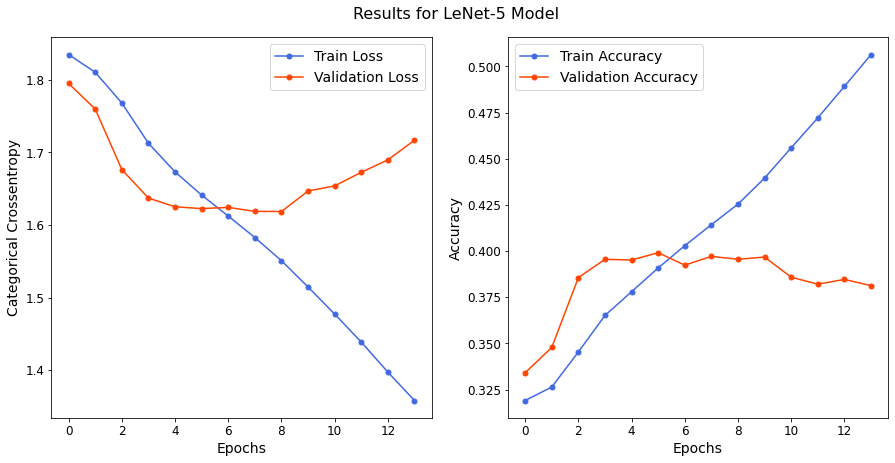

In [ ]:
#Plotting a line chart to visualize the loss and accuracy values by epochs
plot_model_stats(train_loss_lenet5, val_loss_lenet5, train_accuracy_lenet5, val_accuracy_lenet5, 'Results for LeNet-5 Model')

In [ ]:
#Accuracy Evaluation
print('\n--------- LENET-5 ----------\n')
lenet5_acc = round(lenet_5_model.evaluate(test_dataset_lenet5, verbose=0)[1] * 100, 2)
print("Model Accuracy: {}%".format(lenet5_acc))


--------- LENET-5 ----------

Model Accuracy: 37.4%


## AlexNet

**AlexNet** is the name of a **CNN** architecture designed by *Alex Krizhevsky*, *Ilya Sutskever* and *Geoffrey Hinton* presented in the "*ImageNet Classification with Deep Convolutional
Neural Networks*" paper in 2012.  

The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (**GPU**s) during training.  

**AlexNet** expects a 227x227 image as input and it contains 8 layers: 5 convolutional layers, some og them followed by max pooling layers, and the last three are fully connected layers. It uses the *ReLU* activation function, which showed improved training performance over *tanh* and *sigmoid* functions.  

**AlexNet** is considered one of the most influential papers published in computer vision, having spurred many more papers published employing CNNs and GPUs to accelerate deep learning. As of late 2022, the AlexNet paper has been cited over 100,000 times according to Google Scholar.

In [ ]:
alexnet_model = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(227, 227, 3)),
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
])

alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 227, 227, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)     

In [ ]:
#Additionaly, if you do not one-hot encode your data, set sparse_categorical_crossentropy as loss and sparse_categorical_accuracy as metric.
alexnet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# Defining the early stop to monitor the validation loss to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

epochs=50
alexnet_history = alexnet_model.fit(
  train_ds_alexnet,
  validation_data=val_ds_alexnet,
  callbacks=[early_stop],
  epochs=epochs,
  shuffle=True
)

Epoch 1/50
1298/1298 [==============================] - 265s 201ms/step - loss: 2.1831 - sparse_categorical_accuracy: 0.3125 - val_loss: 1.8574 - val_sparse_categorical_accuracy: 0.3143
Epoch 2/50
1298/1298 [==============================] - 258s 198ms/step - loss: 1.6772 - sparse_categorical_accuracy: 0.3811 - val_loss: 1.6035 - val_sparse_categorical_accuracy: 0.3926
Epoch 3/50
1298/1298 [==============================] - 258s 198ms/step - loss: 1.5227 - sparse_categorical_accuracy: 0.4296 - val_loss: 1.5316 - val_sparse_categorical_accuracy: 0.4261
Epoch 4/50
1298/1298 [==============================] - 258s 198ms/step - loss: 1.4051 - sparse_categorical_accuracy: 0.4656 - val_loss: 1.2832 - val_sparse_categorical_accuracy: 0.4939
Epoch 5/50
1298/1298 [==============================] - 257s 198ms/step - loss: 1.3031 - sparse_categorical_accuracy: 0.4980 - val_loss: 1.3261 - val_sparse_categorical_accuracy: 0.4808
Epoch 6/50
1298/1298 [==============================] - 258s 198ms/ste

In [ ]:
#Saving the train and validation loss and accuracy values from AlexNet
train_loss_alexnet = alexnet_history.history['loss']
val_loss_alexnet = alexnet_history.history['val_loss']
train_accuracy_alexnet = alexnet_history.history['sparse_categorical_accuracy']
val_accuracy_alexnet = alexnet_history.history['val_sparse_categorical_accuracy']

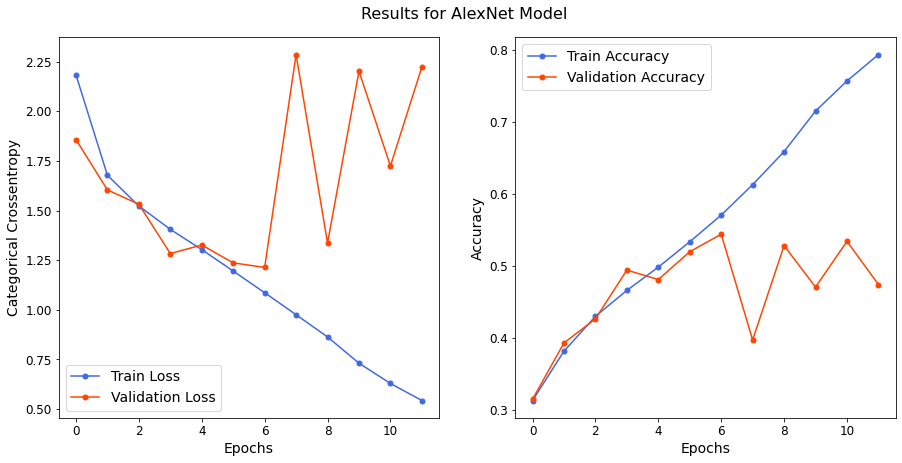

In [ ]:
#Plotting a line chart to visualize the loss and accuracy values by epochs
plot_model_stats(train_loss_alexnet, val_loss_alexnet, train_accuracy_alexnet, val_accuracy_alexnet, 'Results for AlexNet Model')

In [ ]:
#Accuracy Evaluation
print('\n--------- AlexNet ----------\n')
alexnet_acc = round(alexnet_model.evaluate(test_dataset_alexnet, verbose=0)[1] * 100, 2)
print("Model Accuracy: {}%".format(alexnet_acc))


--------- AlexNet ----------

Model Accuracy: 46.13%


In [ ]:
#Defining function to get percentage string from a number 
def perc(num):
  return str(round(float(num)*100, 2))+'%'

#Building the table of the result
table = [['\033[1m#\033[0m', '\033[1mModel Description\033[0m', '\033[1mTrain Loss\033[0m', '\033[1mVal Loss\033[0m', '\033[1mTrain Acc\033[0m', '\033[1mVal Acc\033[0m', '\033[1mTest Acc\033[0m'], 
         ['1', 'LeNet-5', str(round(train_loss_lenet5[-1], 3)), round(val_loss_lenet5[-1], 3), perc(train_accuracy_lenet5[-1]), perc(val_accuracy_lenet5[-1]), perc(lenet5_acc/100)],
         ['2','AlexNet', round(train_loss_alexnet[-1], 3), round(val_loss_alexnet[-1], 3), perc(train_accuracy_alexnet[-1]), perc(val_accuracy_alexnet[-1]), perc(alexnet_acc/100)]
        ]

#Printing the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))  

╒═════╤═════════════════════╤══════════════╤════════════╤═════════════╤═══════════╤════════════╕
│   # │ Model Description   │   Train Loss │   Val Loss │ Train Acc   │ Val Acc   │ Test Acc   │
╞═════╪═════════════════════╪══════════════╪════════════╪═════════════╪═══════════╪════════════╡
│   1 │ LeNet-5             │        1.358 │      1.717 │ 50.64%      │ 38.13%    │ 37.4%      │
├─────┼─────────────────────┼──────────────┼────────────┼─────────────┼───────────┼────────────┤
│   2 │ AlexNet             │        0.543 │      2.223 │ 79.36%      │ 47.38%    │ 46.13%     │
╘═════╧═════════════════════╧══════════════╧════════════╧═════════════╧═══════════╧════════════╛


There are some different **CNN**s we would like to use (*VGG-16*, *ResNet*, *GoogleNet*, *EfficientNet*) but they are complex networks and their training require a lot of time and computational resources. To overcome this kind of issues, in the next notebook we'll introduce the concept of ***transfer learning*** thanks to which we should get even better results.